# Training and Visualizing a Decision Tree

In [1]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

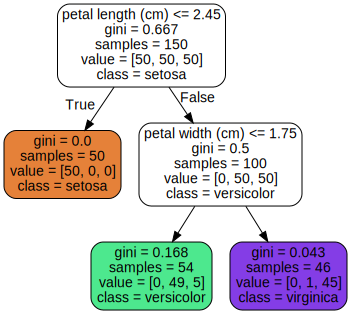

In [4]:
from graphviz import Source
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Estimating Class Probabilities
Based on node impurities

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [8]:
export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "iris_tree_reg.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

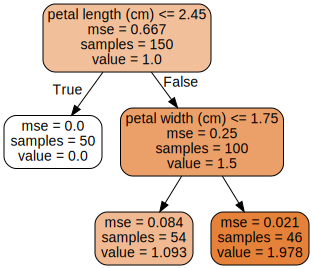

In [9]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_reg.dot"))

Note that the main difference between this tree and the classification tree is that this tree predicts a value at each node instead of a class. This value is the average target value of the training instances associated with the leaf node.

# Exercises
## 7.

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

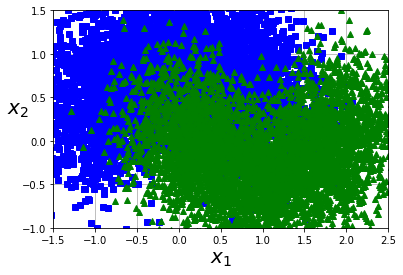

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

wow this is noisy

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_leaf_nodes': np.logspace(1.0, 3.0, num=10).astype(int), 'min_samples_split': [2, 3, 4]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': array([  10,   16,   27,   46,   77,  129,  215,  359,  599, 1000]),
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')

In [14]:
grid_search.best_params_

{'max_leaf_nodes': 27, 'min_samples_split': 2}

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=27)

In [16]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.850375 {'max_leaf_nodes': 10, 'min_samples_split': 2}
0.850375 {'max_leaf_nodes': 10, 'min_samples_split': 3}
0.850375 {'max_leaf_nodes': 10, 'min_samples_split': 4}
0.852125 {'max_leaf_nodes': 16, 'min_samples_split': 2}
0.852125 {'max_leaf_nodes': 16, 'min_samples_split': 3}
0.852125 {'max_leaf_nodes': 16, 'min_samples_split': 4}
0.858625 {'max_leaf_nodes': 27, 'min_samples_split': 2}
0.858625 {'max_leaf_nodes': 27, 'min_samples_split': 3}
0.858625 {'max_leaf_nodes': 27, 'min_samples_split': 4}
0.8535 {'max_leaf_nodes': 46, 'min_samples_split': 2}
0.8535 {'max_leaf_nodes': 46, 'min_samples_split': 3}
0.8535 {'max_leaf_nodes': 46, 'min_samples_split': 4}
0.84825 {'max_leaf_nodes': 77, 'min_samples_split': 2}
0.84825 {'max_leaf_nodes': 77, 'min_samples_split': 3}
0.84825 {'max_leaf_nodes': 77, 'min_samples_split': 4}
0.845125 {'max_leaf_nodes': 129, 'min_samples_split': 2}
0.8455 {'max_leaf_nodes': 129, 'min_samples_split': 3}
0.84475 {'max_leaf_nodes': 129, 'min_samples_split': 4}
0

Tried it on a larger space and found that smaller numbers are best! Grid search again on smaller range.

In [17]:
param_grid = [
    {'max_leaf_nodes': range(2, 16), 'min_samples_split': [2, 3, 4]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': range(2, 16),
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')

In [18]:
grid_search.best_params_

{'max_leaf_nodes': 12, 'min_samples_split': 2}

In [19]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=12)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7699999999999999 {'max_leaf_nodes': 2, 'min_samples_split': 2}
0.7699999999999999 {'max_leaf_nodes': 2, 'min_samples_split': 3}
0.7699999999999999 {'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8171250000000001 {'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8171250000000001 {'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8171250000000001 {'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8530000000000001 {'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8530000000000001 {'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8530000000000001 {'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8530000000000001 {'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8530000000000001 {'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8530000000000001 {'max_leaf_nodes': 5, 'min_samples_split': 4}
0.8530000000000001 {'max_leaf_nodes': 6, 'min_samples_split': 2}
0.8530000000000001 {'max_leaf_nodes': 6, 'min_samples_split': 3}
0.8530000000000001 {'max_leaf_nodes': 6, 'min_samples_split': 4}
0.8530000000000001 {'max_

## 8. Grow a forest
This works by splitting the training set into many smaller mini-sets. Trees are then trained on all of those mini-sets. Each mini-set's tree is then used to predict the test set. With all of those predictions, the "final" prediction for each instance in the test set is chosen as the most frequently predicted class from all of the mini-set's trees (at that instance).

Most of this was copied from solutions https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

In [21]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [22]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    # fit the tree on the mini set
    tree.fit(X_mini_train, y_mini_train)
    
    # generate a prediction from the entire test set
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8160049999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [23]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [24]:
Y_pred.shape

(1000, 2000)

1,000 trees; 2,000 instances in test set (20% of 10,000 full set). Each row is a prediction for every entry of test set for a given tree. Two options: 0 or 1.

In [25]:
Y_pred

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [27]:
y_pred_majority_votes.shape

(1, 2000)

Most frequent class (either 0 or 1) chosen amongst all trees for each test set instance.

In [28]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8735

Does better! Interesting thing to note here: the model doesn't do any better with default moon dataset, i.e. without randomseed=42; for that seeding, however, it improves with the forst.